In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

## Examen 3

1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$ $x$ es la posicion y $v$ la velocidad



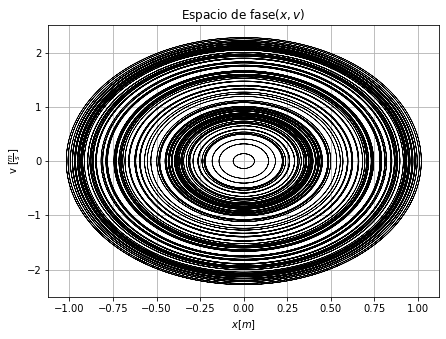

In [88]:
def dx_dt(U,t):
  x,v = U
  k = 1
  m = 0.2
  return [v, (-k/ m)*x ]

np.random.seed(1000351000)
N = 1000
x0=np.random.uniform(-1,1,N)
v0=np.random.uniform(-1,1,N)
t=np.linspace(0,10,N)

i=0
plt.figure(figsize=(7,5))
for x0,v0 in zip(x0,v0):
  U0=[x0,v0]
  Us=odeint(dx_dt,U0,t)
  plt.plot(Us[:,0], Us[:,1], lw=0.5,color= 'k')
  if i==100:
    break
  i=i+1
plt.title("Espacio de fase$(x,v)$")
plt.xlabel(r"$x [m]$")
plt.ylabel('v'' 'r"$[\frac{m}{s}]$")
plt.grid()
plt.show()

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

No handles with labels found to put in legend.


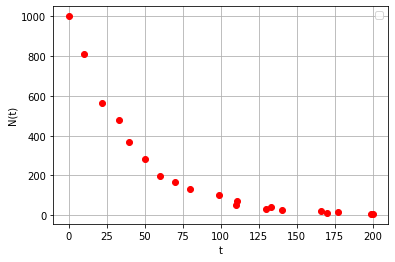

In [94]:
df=pd.DataFrame(pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json"))
t = df['t'].to_list()
N = df['N(t)'].to_list()
plt.plot(t,N,'ro')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.grid()
plt.show()

In [95]:
def f(x,a,b):
  return a*np.exp(-b*x) 
  
popt,pcov = curve_fit(f,t,N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


la vida media:τ = 27.64±0.01 años


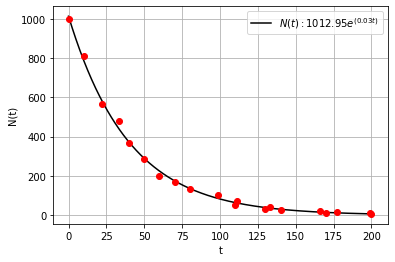

In [100]:
  
print('la vida media:τ = {:.2f}±{:.2f} años'.format(np.log(2)/popt[1],(np.log(2))/popt[1]*σ[1]))

t_ = np.linspace(0,201,1000)

plt.plot(t_,f(t_,*popt),'k',label=r'$N(t): %5.2fe^{(%5.2ft)}$' % tuple(popt))
plt.plot(t,N,'ro')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.legend()
plt.grid()
plt.show()